**Question 1:  What is Ensemble Learning in machine learning? Explain the key idea behind it.**

> A machine learning technique that combines multiple models to produce a more accurate and robust final model. It trains several "weak learners" and then aggregates their predictions. Techniques are:

* Boosting
* Bagging
* Stacking

**Question 2: What is the difference between Bagging and Boosting?**

> Bagging: It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average.

> Boosting: It is also a homogeneous weak learners’ model, learners learn sequentially and adaptively to improve model predictions of a learning algorithm.

**Question 3: What is bootstrap sampling and what role does it play in Bagging methods like Random Forest?**

> Bagging or Bootstrap Aggregating, works by training multiple base models independently and in parallel on different random subsets of the training data. These subsets are created using bootstrap sampling, where data points are randomly selected with replacement, allowing some samples to appear multiple times while others may be excluded.

* In classification tasks, the final prediction is decided by majority voting, the class chosen by most base models.
* For regression tasks, predictions are averaged across all base models, known as bagging regression.

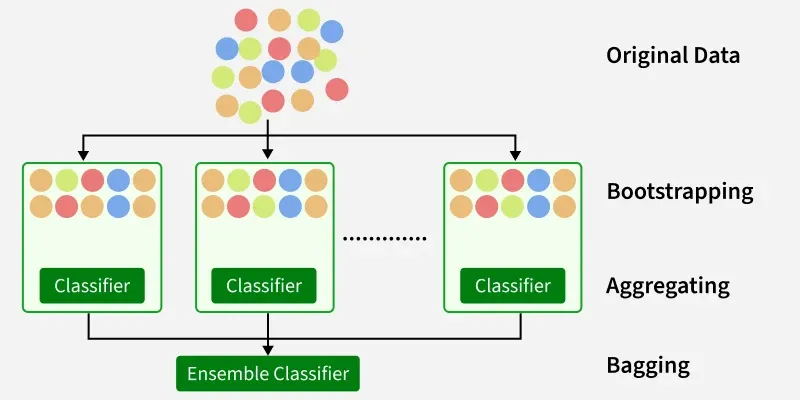

**Question 4: What are Out-of-Bag (OOB) samples and how is OOB score used to
evaluate ensemble models?**

> Out-of-Bag (OOB) samples are data points from the original training set that are not included in a specific bootstrap sample used to train a model in an ensemble method like Random Forest. These OOB samples are used to create the OOB score, which evaluates the model's performance without needing a separate validation set.

**Question 5: Compare feature importance analysis in a single Decision Tree vs. a Random Forest.**

> * Reliability: Random forest features are genra;ly more reliable and robust due to the aggregation of multiple trees, while single descision tree importance can be unstable.
>
>* Method: Random forest enhance impurity reduction by averaging/mode the impurity across the tress.
>
>* Interpretibility: Decision tree structure offers direct interpretibility  ut less trustworthy, while random forest is more robust.


**Question 6: Write a Python program to:**
* Load the Breast Cancer dataset using
sklearn.datasets.load_breast_cancer()
* Train a Random Forest Classifier
* Print the top 5 most important features based on feature importance scores.


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 most important features
print("Top 5 most important features:")
print(feature_importance_df.head(5))

Top 5 most important features:
                 Feature  Importance
23            worst area    0.139357
27  worst concave points    0.132225
7    mean concave points    0.107046
20          worst radius    0.082848
22       worst perimeter    0.080850


**Question 7: Write a Python program to:**
* Train a Bagging Classifier using Decision Trees on the Iris dataset
* Evaluate its accuracy and compare with a single Decision Tree



In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier using Decision Trees
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Evaluate the Bagging Classifier
bagging_predictions = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Classifier Accuracy:", bagging_accuracy)

**Question 8: Write a Python program to:**
* Train a Random Forest Classifier
* Tune hyperparameters max_depth and n_estimators using GridSearchCV
* Print the best parameters and final accuracy

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load a sample dataset (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20]     # Maximum depth of the tree
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Get the best estimator (model with the best parameters)
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Calculate and print the final accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final accuracy with best parameters: {accuracy:.2f}")



Best parameters found: {'max_depth': None, 'n_estimators': 150}
Final accuracy with best parameters: 1.00


**Question 9: Write a Python program to:**
* Train a Bagging Regressor and a Random Forest Regressor on the California
Housing dataset
* Compare their Mean Squared Errors (MSE)




In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Bagging Regressor
# The base estimator for BaggingRegressor is a DecisionTreeRegressor by default
bagging_regressor = BaggingRegressor(random_state=42)
bagging_regressor.fit(X_train, y_train)

# Make predictions with the Bagging Regressor
y_pred_bagging = bagging_regressor.predict(X_test)

# Calculate the Mean Squared Error for Bagging Regressor
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print(f"Mean Squared Error (Bagging Regressor): {mse_bagging:.2f}")

# Initialize and train the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train)

# Make predictions with the Random Forest Regressor
y_pred_rf = random_forest_regressor.predict(X_test)

# Calculate the Mean Squared Error for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest Regressor): {mse_rf:.2f}")

# Compare the MSEs
if mse_bagging < mse_rf:
    print("Bagging Regressor performed better (lower MSE).")
elif mse_rf < mse_bagging:
    print("Random Forest Regressor performed better (lower MSE).")
else:
    print("Both regressors achieved the same MSE.")



Mean Squared Error (Bagging Regressor): 0.28
Mean Squared Error (Random Forest Regressor): 0.26
Random Forest Regressor performed better (lower MSE).


**Question 10: You are working as a data scientist at a financial institution to predict loan
default. You have access to customer demographic and transaction history data.
You decide to use ensemble techniques to increase model performance.
Explain your step-by-step approach to:**


* Choose between Bagging or Boosting:
    * Start from bagging (random forest) if overfitting is to prevent
    * XGBoost if model accuracy is low and underfitting.
* Handle overfitting:
    * Use cross-validation to monitor performance.
    * Apply regularization (e.g., max_depth, min_child_weight, learning_rate for Boosting).
    * Use feature selection or dropout-like techniques.
    * Use early stopping for Boosting.

* Select base models:
    * Decision Trees (for Bagging/Boosting)
    * Logistic Regression, SVM, or KNN (for stacking ensembles)
* Evaluate performance using cross-validation
    * Use k-Fold Cross Validation (e.g., k=5 or 10).
    * Metric: AUC, Accuracy, or F1-score depending on business need.
* Justify how ensemble learning improves decision-making in this real-world
context:
  * Reduces variance and bias & provides more robust predictions against noisy data.


In [6]:
# Step 1: Import Libraries
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.datasets import make_classification

# Step 2: Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Bagging (Random Forest)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Step 5: Boosting (Gradient Boosting)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

# Step 6: Evaluate using cross-validation
rf_cv = cross_val_score(rf, X, y, cv=5, scoring='roc_auc').mean()
gb_cv = cross_val_score(gb, X, y, cv=5, scoring='roc_auc').mean()

print("Random Forest AUC:", rf_cv)
print("Gradient Boosting AUC:", gb_cv)
print("Best Model:", "Boosting" if gb_cv > rf_cv else "Bagging")




Random Forest AUC: 0.9432400000000001
Gradient Boosting AUC: 0.94992
Best Model: Boosting
